# Helper functions for visualizing network

In [1]:
from graph import *

In [2]:
def get_node_color(node, graph):
    node_color = {
        'parameter': 'green',
        'inputs': 'blue',
        'outcomes': 'blue',
        'prediction': 'brown',
        'objective': 'yellow'
    }
    if node == graph.prediction:
        return node_color['prediction']
    elif node == graph.objective:
        return node_color['objective']
    elif node in graph.inputs:
        return node_color['inputs']
    elif node in graph.parameters:
        return node_color['parameter']
    elif node in graph.outcomes:
        return node_color['outcomes']

In [3]:
from mlp_regression_sol import *

In [4]:
estimator = MLPRegression(num_hidden_units=10,
                          step_size=0.001,
                          init_param_scale=.0005, 
                          max_num_epochs=5000)

In [5]:
def get_edge_list(objective, graph):
    """Returns edge and vertex list for graphviz."""
    E = [] # Edge list
    V = [] # Vertex list
    T = set() # Set of temporarily marked nodes
    P = set() # Set of permanently marked nodes

    def visit(node, graph, E, V):
        if node in P:
            return
        if node in T:
            raise 'Your graph is not a DAG!'
        T.add(node) # mark node temporarily
        V.append((node.node_name, get_node_color(node, graph))) # Add node to edge list
        for predecessor in node.get_predecessors():
            E.append((node.node_name, predecessor.node_name))
            visit(predecessor, graph, E, V)
        P.add(node) # mark node permanently

    visit(objective, graph, E, V)
    return E,V

In [6]:
E,V = get_edge_list(estimator.objective, estimator)

In [7]:
import graphviz as gv

In [8]:
graph = gv.Digraph(format='svg')

In [9]:
[graph.node(name, color=color) for name, color in V]
[graph.edge(name2, name1) for name1, name2 in E]

[None, None, None, None, None, None, None, None, None]

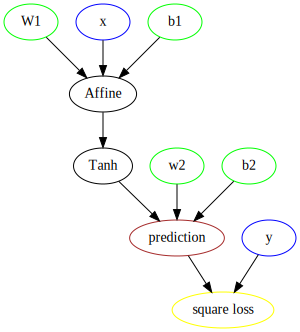

In [10]:
graph